In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
data=pd.read_csv("sleep_cycle_productivity.csv")
data.head(5)

,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
0,2024-04-12,1860,32,Other,23.33,4.61,5.28,3,86,87,116,8.808920,8,3,6
1,2024-11-04,1769,41,Female,21.02,2.43,5.41,5,32,21,88,6.329833,10,3,7
2,2024-08-31,2528,20,Male,22.10,3.45,5.35,7,17,88,59,8.506306,10,9,10
3,2024-02-22,8041,37,Other,23.10,6.65,7.55,8,46,34,80,6.070240,8,4,2
4,2024-02-23,4843,46,Other,21.42,4.17,6.75,10,61,269,94,11.374994,8,7,9


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           5000 non-null   object 
 1   Person_ID                      5000 non-null   int64  
 2   Age                            5000 non-null   int64  
 3   Gender                         5000 non-null   object 
 4   Sleep Start Time               5000 non-null   float64
 5   Sleep End Time                 5000 non-null   float64
 6   Total Sleep Hours              5000 non-null   float64
 7   Sleep Quality                  5000 non-null   int64  
 8   Exercise (mins/day)            5000 non-null   int64  
 9   Caffeine Intake (mg)           5000 non-null   int64  
 10  Screen Time Before Bed (mins)  5000 non-null   int64  
 11  Work Hours (hrs/day)           5000 non-null   float64
 12  Productivity Score             5000 non-null   i

In [22]:
data.describe()

,Person_ID,Age,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5527.152200,38.590600,22.005350,4.980262,6.974902,5.520800,43.962600,146.71140,91.421200,7.987873,5.644200,5.370600,5.548000
std,2595.391771,12.302799,1.157591,1.862508,1.454033,2.863845,25.798541,85.83139,52.079123,2.275734,2.872221,2.835783,2.888419
min,1000.000000,18.000000,20.000000,0.560000,4.500000,1.000000,0.000000,0.00000,0.000000,4.000067,1.000000,1.000000,1.000000
25%,3258.000000,28.000000,21.020000,3.660000,5.690000,3.000000,22.000000,73.00000,46.000000,6.032720,3.000000,3.000000,3.000000
50%,5603.000000,39.000000,22.020000,4.970000,6.960000,5.000000,44.000000,144.00000,92.000000,7.998295,6.000000,5.000000,6.000000
75%,7749.500000,49.000000,23.000000,6.310000,8.210000,8.000000,66.000000,220.00000,136.000000,9.905024,8.000000,8.000000,8.000000
max,9998.000000,59.000000,23.980000,9.420000,9.500000,10.000000,89.000000,299.00000,179.000000,11.999141,10.000000,10.000000,10.000000


In [23]:
data.isnull().sum()

Date                             0
Person_ID                        0
Age                              0
Gender                           0
Sleep Start Time                 0
Sleep End Time                   0
Total Sleep Hours                0
Sleep Quality                    0
Exercise (mins/day)              0
Caffeine Intake (mg)             0
Screen Time Before Bed (mins)    0
Work Hours (hrs/day)             0
Productivity Score               0
Mood Score                       0
Stress Level                     0
dtype: int64

In [24]:
data.duplicated().sum()

0

# EDA

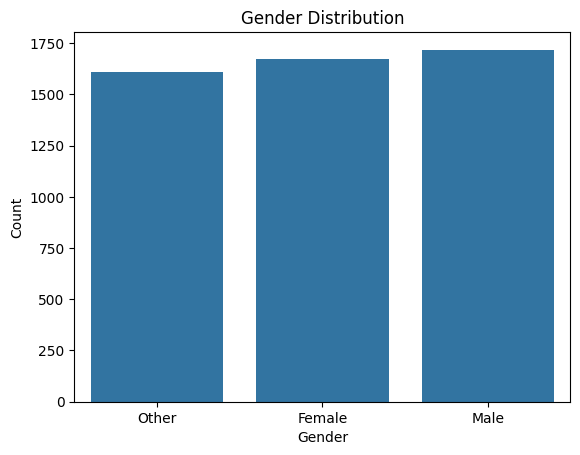

In [25]:
sns.countplot(data=data, x='Gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

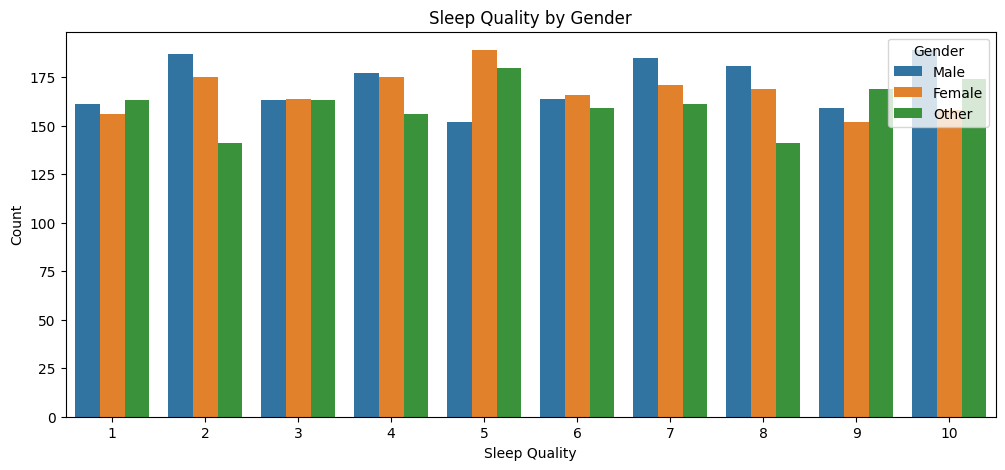

In [26]:
plt.figure(figsize=(12,5))
sns.countplot(data=data, x='Sleep Quality', hue='Gender')
plt.title('Sleep Quality by Gender')
plt.xlabel('Sleep Quality')
plt.ylabel('Count')
plt.show()

In [27]:
data["Gender"]=data["Gender"].replace({"Female":11,"Male":10,"Other":110})

/var/folders/km/41xdld515hq8qyv7nx3qq6n80000gn/T/ipykernel_82066/2799742863.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Gender"]=data["Gender"].replace({"Female":11,"Male":10,"Other":110})


In [28]:
data["Date"]=pd.to_datetime(data["Date"])
data.set_index("Date",inplace=True)

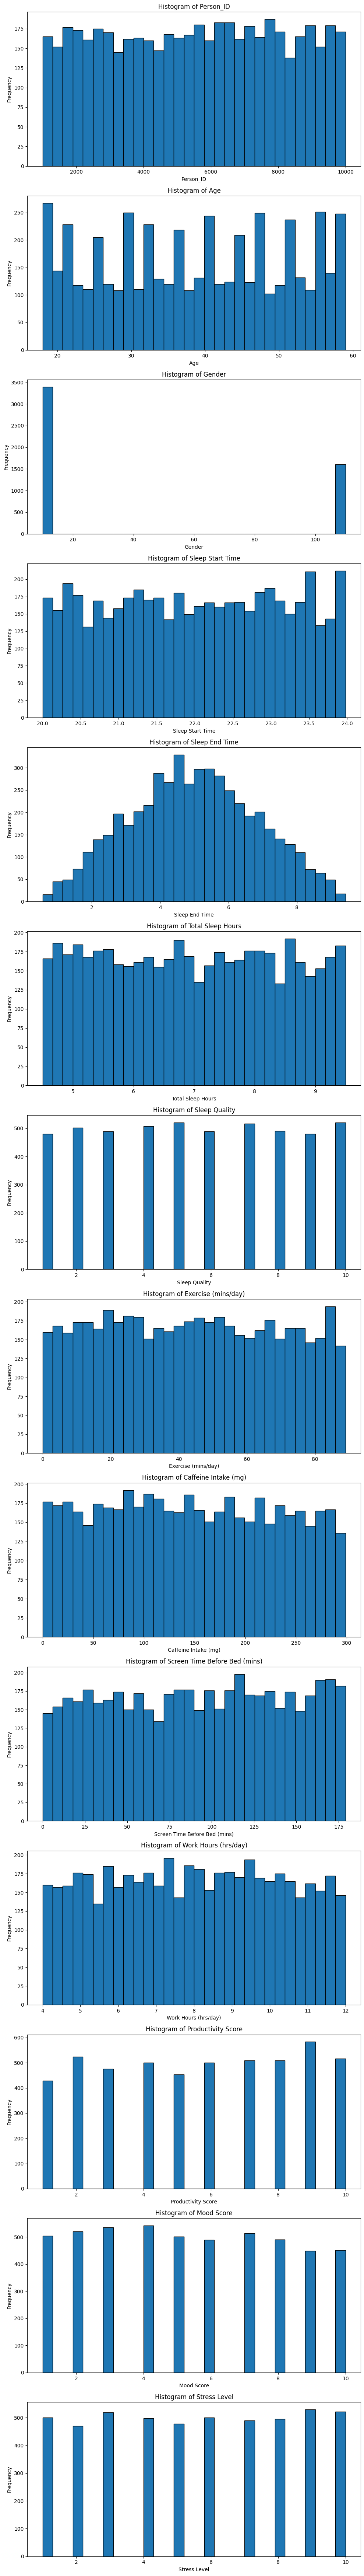

In [29]:
numerical_columns = data.select_dtypes(include=['number']).columns
fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(10, len(numerical_columns)*5))
for i, col in enumerate(numerical_columns):
    axes[i].hist(data[col].dropna(), bins=30, edgecolor='black')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

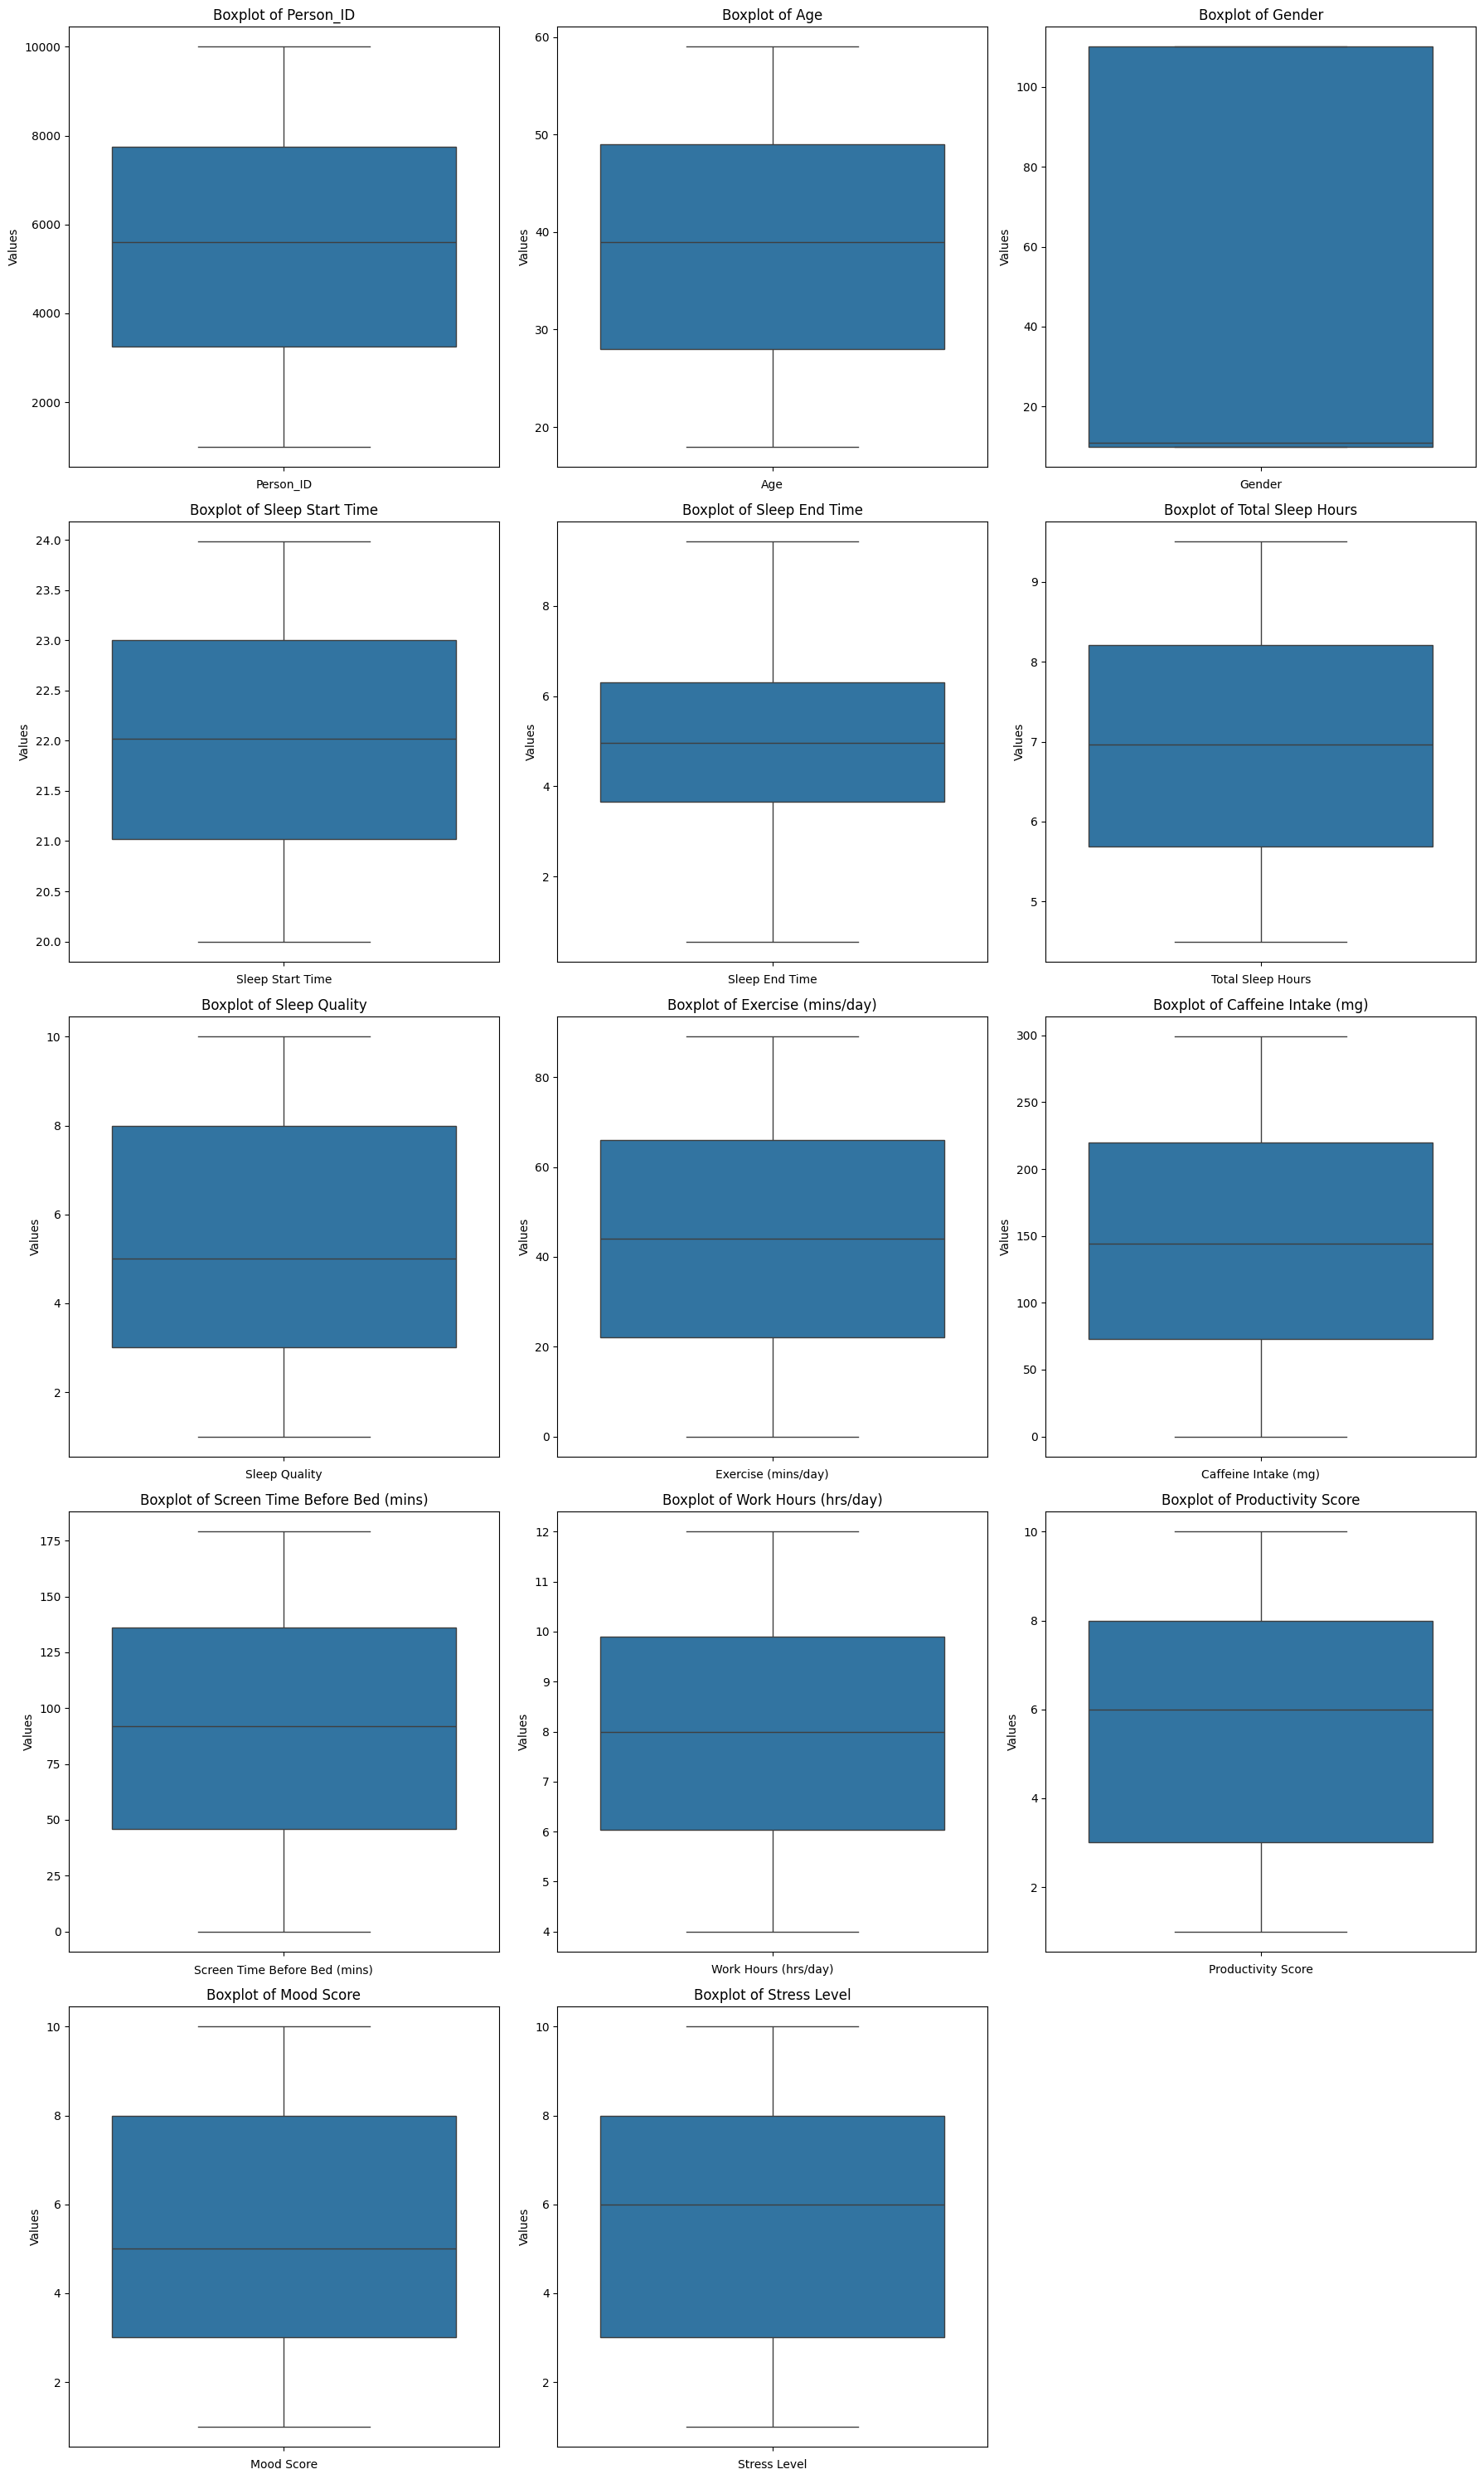

In [30]:
num_columns = len(numerical_columns)
num_rows = (num_columns // 3) + (num_columns % 3 > 0)  
plt.figure(figsize=(18, 6 * num_rows))
for i, col in enumerate(numerical_columns):
    plt.subplot(num_rows, 3, i + 1) 
    sns.boxplot(data=data[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Values')

# Display the plot
plt.tight_layout()
plt.show()

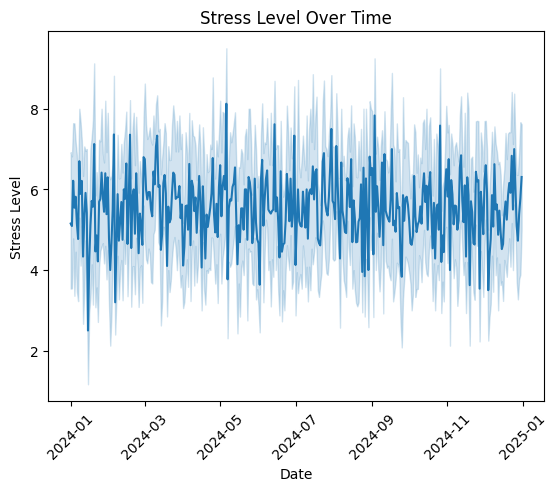

In [31]:
sns.lineplot(data=data, x='Date', y='Stress Level')
plt.title('Stress Level Over Time')
plt.xlabel('Date')
plt.ylabel('Stress Level')
plt.xticks(rotation=45)
plt.show()

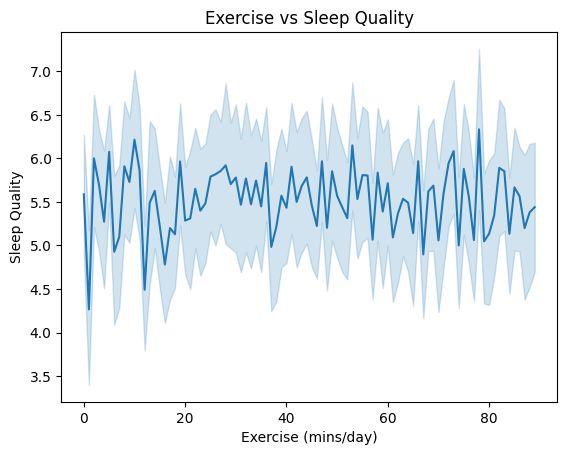

In [32]:
sns.lineplot(data=data, x='Exercise (mins/day)', y='Sleep Quality')
plt.title('Exercise vs Sleep Quality')
plt.xlabel('Exercise (mins/day)')
plt.ylabel('Sleep Quality')
plt.show()


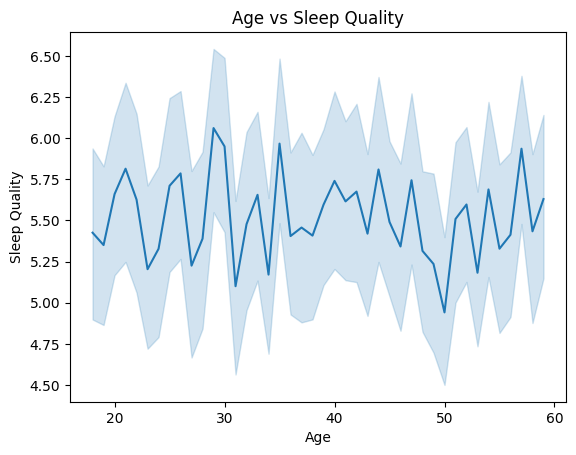

In [33]:
sns.lineplot(data=data, x='Age', y='Sleep Quality')
plt.title('Age vs Sleep Quality')
plt.xlabel('Age')
plt.ylabel('Sleep Quality')
plt.show()


<Axes: >

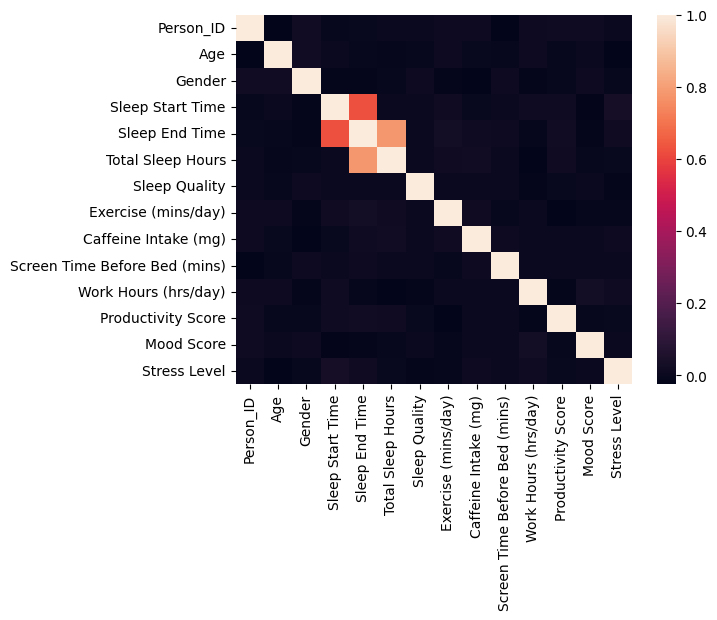

In [34]:
sns.heatmap(data.corr())

# If you like my notebook please UPVOTE it !